In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_excel("TA1.xlsx")

In [ ]:
df

,Publisher,Keyword,Ad Group,Keyword Type,Clicks,Impressions,CTR,Avg CPC,Total Advertising Cost,Avg Position,Conversions,Revenue per Conversion,Total Revenue
0,Overture,fun games,Kid's Games,exact,245,3705,0.066100,0.38,91.92,1.78,14,117.535033,1645.490458
1,Overture,math games,Math Games,phrase,54,1775,0.030400,0.51,27.73,2.76,5,120.013201,600.066004
2,Overture,For kids games,Kid's Games,broad,70,1019,0.068700,0.25,17.35,2.53,6,100.423288,602.539728
3,Overture,kids games,Kid's Games,phrase,45,963,0.046700,0.21,9.31,3.52,5,114.841613,574.208065
4,Overture,www.games,Kid's Games,broad,5,465,0.010800,0.12,0.60,4.29,0,110.614357,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,Yahoo-US,math games 8th grade,math games - YU,phrase,0,34,0.000000,0.00,0.00,4.93,0,80.604881,0.000000
2329,Yahoo-US,number math games,math games - YU,broad,1,69,0.014493,0.91,0.91,3.12,0,172.592744,0.000000
2330,Yahoo-US,play free math games.com,math games - YU,broad,0,39,0.000000,0.00,0.00,4.52,0,273.393984,0.000000
2331,Yahoo-US,math games for kids grade 6,math games - YU,broad,1,125,0.008000,0.07,0.07,7.92,0,227.256664,0.000000


In [ ]:
df.columns

Index(['Publisher', 'Keyword', 'Ad Group', 'Keyword Type', 'Clicks',
       'Impressions', 'CTR', 'Avg CPC', 'Total Advertising Cost',
       'Avg Position', 'Conversions', 'Revenue per Conversion',
       'Total Revenue'],
      dtype='object')

# Step1: Identify key performance metrcis based on publishers

In [ ]:
table = pd.pivot_table(df, values = ['Clicks','Impressions', 'Total Advertising Cost', 'Conversions', 'Total Revenue'], index = ['Publisher'], aggfunc = np.sum)

In [ ]:
table

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue
Publisher,,,,,
Google-Global,1886,280,46368,1326.04,43103.298733
Google-US,3765,716,59880,2730.59,174012.797061
MSN-Global,466,348,74731,293.21,31873.507235
MSN-US,289,140,42440,185.76,19103.986289
Overture,587,63,13202,202.15,6679.198070
Yahoo-Global,717,154,77989,479.60,22126.577844
Yahoo-US,617,173,67990,284.55,33750.377869


In [ ]:
kpi=pd.DataFrame()
kpi['NetRevenue']=table['Total Revenue']-table['Total Advertising Cost']
kpi['ROA']=kpi['NetRevenue']/table['Total Advertising Cost']
kpi['AvgRevenuePerBooking']=table['Total Revenue']/table['Conversions']
kpi['ProbOfBooking']=table['Conversions']/table['Impressions']
kpi['AvgCostPerClick']=table['Total Advertising Cost']/table['Clicks']
kpi['SumAdCost']=table['Total Advertising Cost']
kpi

,NetRevenue,ROA,AvgRevenuePerBooking,ProbOfBooking,AvgCostPerClick,SumAdCost
Publisher,,,,,,
Google-Global,41777.258733,31.505278,153.940353,0.006039,0.703097,1326.04
Google-US,171282.207061,62.727179,243.034633,0.011957,0.725256,2730.59
MSN-Global,31580.297235,107.705389,91.590538,0.004657,0.629206,293.21
MSN-US,18918.226289,101.842303,136.457045,0.003299,0.642768,185.76
Overture,6477.048070,32.040802,106.019017,0.004772,0.344378,202.15
Yahoo-Global,21646.977844,45.135483,143.679077,0.001975,0.668898,479.60
Yahoo-US,33465.827869,117.609657,195.088889,0.002544,0.461183,284.55


Key observations:
    
Google US has the highest Net Revuene, but its average cost is also the highest.

Yahoo US has the highest ROA but the probability of booking is low.

# Step2: Optimize publisher strategy

In [ ]:
import matplotlib.pyplot as plt

x = kpi['ProbOfBooking'] * 1000
y = kpi['AvgCostPerClick']
size = kpi['SumAdCost']
color = np.random.rand(7) 

glb_avg_prob_booking = np.sum(df['Conversions']) / np.sum(df['Impressions'])
glb_avg_cost_click = np.sum(df['Total Advertising Cost']) / np.sum(df['Clicks']) 

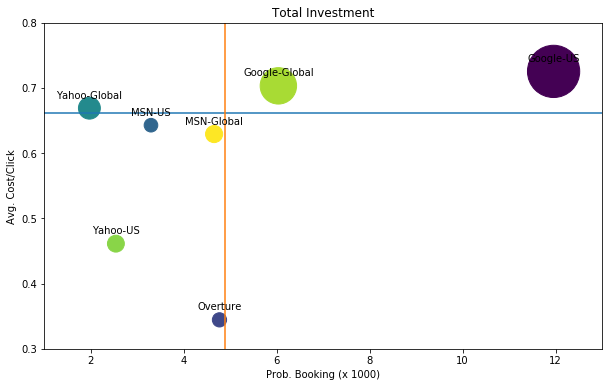

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x, y,s = size, c = color )
plt.plot([1, 13], [glb_avg_cost_click, glb_avg_cost_click])
plt.plot([glb_avg_prob_booking * 1000, glb_avg_prob_booking * 1000], [0.3, 0.8])

for xi,yi,i in zip(x, y, kpi.index):
    plt.annotate(i, (xi,yi), textcoords="offset points", xytext=(0,10), ha='center')

plt.axis([1, 13, 0.3, 0.8])
plt.xlabel("Prob. Booking (x 1000)")
plt.ylabel("Avg. Cost/Click")
plt.title("Total Investment")
plt.show()

Optimize Publisher Strategy:

Yahoo-Global has the lowest probability of booking and relatively high CPC. Consider to remove this publisher.

Google-Global and Google-US have a high probability of booking but also high CPC. So consider to deploy strategy to reduce CPC(cost) through tactical campaign changes, such as adjusting bid startegy, match type, keyword selection, and position. 

MSN-US, MSN-Global, Yahoo-US and Overture have a low probability of booking but acceptable CPC. Consider to deploy startegy to improve CTR and TCR of Yahoo-US,MSN-US, MSN-Global and Overture campaigns through copy improvements, either search side copy or website copy.

# #1: Does Google require an improvement on search side copy? Does Yahoo require an improvement on website side copy?

In [ ]:
table['Company']=['Google', 'Google', 'MSN', 'MSN', 'Overture', 'Yahoo', 'Yahoo']

In [ ]:
table['CTR']=table['Clicks']/table['Impressions'] 
table['TCR']=table['Conversions']/table['Clicks']
table

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue,Company,CTR,TCR
Publisher,,,,,,,,
Google-Global,1886,280,46368,1326.04,43103.298733,Google,0.040675,0.148462
Google-US,3765,716,59880,2730.59,174012.797061,Google,0.062876,0.190173
MSN-Global,466,348,74731,293.21,31873.507235,MSN,0.006236,0.746781
MSN-US,289,140,42440,185.76,19103.986289,MSN,0.006810,0.484429
Overture,587,63,13202,202.15,6679.198070,Overture,0.044463,0.107325
Yahoo-Global,717,154,77989,479.60,22126.577844,Yahoo,0.009194,0.214784
Yahoo-US,617,173,67990,284.55,33750.377869,Yahoo,0.009075,0.280389


In [ ]:
table_pt = pd.pivot_table(table, values = ['Clicks','Impressions', 'Total Advertising Cost', 'Conversions', 'Total Revenue'], index = ['Company'], aggfunc = np.sum)
table_pt

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue
Company,,,,,
Google,5651,996,106248,4056.63,217116.095795
MSN,755,488,117171,478.97,50977.493523
Overture,587,63,13202,202.15,6679.198070
Yahoo,1334,327,145979,764.15,55876.955713


In [ ]:
table_pt['CTR']=table_pt['Clicks']/table_pt['Impressions']
table_pt['TCR']=table_pt['Conversions']/table_pt['Clicks']
table_pt['Net Rev']=table_pt['Total Revenue'] - table_pt['Total Advertising Cost'] 
table_pt

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue,CTR,TCR,Net Rev
Company,,,,,,,,
Google,5651,996,106248,4056.63,217116.095795,0.053187,0.176252,213059.465795
MSN,755,488,117171,478.97,50977.493523,0.006444,0.646358,50498.523523
Overture,587,63,13202,202.15,6679.198070,0.044463,0.107325,6477.048070
Yahoo,1334,327,145979,764.15,55876.955713,0.009138,0.245127,55112.805713


In [ ]:
AvgCTR=np.sum(df['Clicks'])/np.sum(df['Impressions'])
AvgTCR=np.sum(df['Conversions'])/np.sum(df['Clicks'])
print(AvgCTR)
print(AvgTCR)

0.02176424464192368
0.22505103878948002


In [ ]:
import matplotlib.pyplot as plt
x=table_pt['CTR'] 
y=table_pt['TCR'] 
size=table_pt['Net Rev']/100
color=np.random.rand(4)

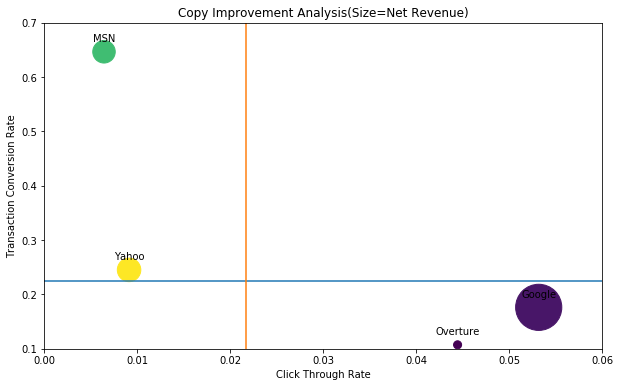

In [ ]:
plt.figure(figsize=(10,6))
plt.axis([0.00,0.06,0.1,0.7])
plt.xlabel('Click Through Rate')
plt.ylabel('Transaction Conversion Rate')
plt.title('Copy Improvement Analysis(Size=Net Revenue)')

plt.scatter(x,y,s=size, c=color)
plt.plot([0.00,0.06], [AvgTCR, AvgTCR])
plt.plot([AvgCTR, AvgCTR],[0.1,0.7] )

for xi, yi, i in zip(x,y,x.index):
    plt.annotate(i,(xi,yi),textcoords='offset points', xytext=(0,10), ha='center')
plt.show()

Google does not require an improvement on search side copy. Rather, it requires an improvement on website side copy.
Because it has the highest CTR(53%) already but relatively low TCR(18%). The average TCR is 23%. 

Yahoo needs to consider search side copy rather than website side copy. Because its click through rate(0.9%) is far below the average(2.2%), while its transaction conversion rate(25%) is just above the average(23%).

# #2: The company expects that the exact match and phrase match keywords would provide higher ROA compared to broad match keywords. While updating their strategy they are thinking about bidding on only exact and phrase match keywords. Would you support this decision?

In [ ]:
#Top 10 ROA campaigns
df['NetRevenue']=df['Total Revenue']-df['Total Advertising Cost']
df['ROA']=df['NetRevenue']/df['Total Advertising Cost']
campaign=df.sort_values(by='ROA',ascending=False)
campaign[['Publisher', 'Keyword', 'Keyword Type', 'Avg Position', 'Ad Group','ROA', 'NetRevenue']].head(10)

,Publisher,Keyword,Keyword Type,Avg Position,Ad Group,ROA,NetRevenue
163,Yahoo-US,crazy monkey games,broad,6.03,Zombie games,6992.965379,3146.834421
1927,MSN-US,i like math games,phrase,2.27,math games - MU,6643.479823,1993.043947
1864,Google-Global,math games for toddlers,broad,7.55,math games - GG,6484.772262,1296.954452
131,Yahoo-US,zombie survival games,phrase,2.04,Zombie games,5507.418190,550.741819
246,Google-US,zombie video game,phrase,1.82,Zombie Games-G,4302.013532,645.302030
2281,Yahoo-Global,math games quizzes,exact,5.53,math games - YG,4267.004285,213.350214
165,Yahoo-US,cool games,phrase,2.10,Zombie games,3735.306146,186.765307
150,Yahoo-US,make a zombie game,broad,2.94,Zombie games,3689.189380,184.459469
1809,Google-Global,elementary school math games,exact,2.08,math games - GG,2935.615800,146.780790
200,Yahoo-US,online zombie games free,phrase,2.09,Zombie games,2652.028008,132.601400


Observations:

The top 10 ROA campaigns have all broad, phrase and exact keyword match types. Broad seems having higher ROA. 

In [1]:
#Change to another way to look into it.

In [ ]:
t = pd.pivot_table(df, values = ['Total Revenue','Total Advertising Cost'], index = ['Keyword Type'], aggfunc = np.sum)
t

,Total Advertising Cost,Total Revenue
Keyword Type,,
broad,1836.14,160983.651988
exact,1883.36,53821.547856
phrase,1782.40,115844.543258


In [ ]:
t['NetRevenue']=t['Total Revenue']-t['Total Advertising Cost']
t['ROA']=t['NetRevenue']/t['Total Advertising Cost']
t

,Total Advertising Cost,Total Revenue,NetRevenue,ROA
Keyword Type,,,,
broad,1836.14,160983.651988,159147.511988,86.675042
exact,1883.36,53821.547856,51938.187856,27.577408
phrase,1782.40,115844.543258,114062.143258,63.993572


Perspective:

I will not support the decision of bidding on only exact and phrase match keywords. Because the assumption that the exact match and phrase match keywords would provide higher ROA compared to broad match keywords is not valid.

Based on calculation, ROA of broad match keywords campaigns is higher than those of exact and phrase match keywords. Compared to the broad keyword match type, exact and phrase keyword match types will narrow the audience.  

# #3: The company feels that global audience (targeted through Google ‐Global, MSN Global and Yahoo ‐ Global) does not purchase the top of the lines products from it and wishes to know if it is worthwhile to still invest in advertising to global audience. What do you recommend?

In [ ]:
table.sort_values(by='Conversions', ascending=False)

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue,Company,CTR,TCR
Publisher,,,,,,,,
Google-US,3765,716,59880,2730.59,174012.797061,Google,0.062876,0.190173
MSN-Global,466,348,74731,293.21,31873.507235,MSN,0.006236,0.746781
Google-Global,1886,280,46368,1326.04,43103.298733,Google,0.040675,0.148462
Yahoo-US,617,173,67990,284.55,33750.377869,Yahoo,0.009075,0.280389
Yahoo-Global,717,154,77989,479.60,22126.577844,Yahoo,0.009194,0.214784
MSN-US,289,140,42440,185.76,19103.986289,MSN,0.006810,0.484429
Overture,587,63,13202,202.15,6679.198070,Overture,0.044463,0.107325


In [ ]:
#Global platform conversions:
348+280+154

782

In [ ]:
#US platform conversions
716+173+140

1029

Perspective:
    
Based on the result shown above, the number of conversions from MSN-Global, Google-Global, and Yahoo-Global is 782. The number of conversions from the those three publishers' US market is 1029.

However, the global market is definately worth investment especially MSN-Global and Google-Global which generate a good amount of conversions(the second and third highest conversions respectvely). Additionally, MSN Global has the second highest ROA return. Therefore, global market is still worthwhile to invest.


# #4: Would the search side strategies that the company should employ be different for US audience and Global audience?

In [ ]:
table['NetRevenue']=table['Total Revenue']-table['Total Advertising Cost']
table

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue,Company,CTR,TCR,NetRevenue
Publisher,,,,,,,,,
Google-Global,1886,280,46368,1326.04,43103.298733,Google,0.040675,0.148462,41777.258733
Google-US,3765,716,59880,2730.59,174012.797061,Google,0.062876,0.190173,171282.207061
MSN-Global,466,348,74731,293.21,31873.507235,MSN,0.006236,0.746781,31580.297235
MSN-US,289,140,42440,185.76,19103.986289,MSN,0.006810,0.484429,18918.226289
Overture,587,63,13202,202.15,6679.198070,Overture,0.044463,0.107325,6477.048070
Yahoo-Global,717,154,77989,479.60,22126.577844,Yahoo,0.009194,0.214784,21646.977844
Yahoo-US,617,173,67990,284.55,33750.377869,Yahoo,0.009075,0.280389,33465.827869


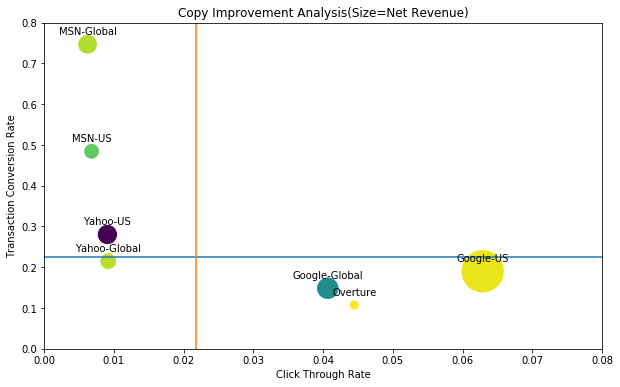

In [ ]:
x=table['CTR'] 
y=table['TCR'] 
size=table['NetRevenue']/100
color=np.random.rand(7)

plt.figure(figsize=(10,6))
plt.axis([0.00,0.08,0.0,0.8])
plt.xlabel('Click Through Rate')
plt.ylabel('Transaction Conversion Rate')
plt.title('Copy Improvement Analysis(Size=Net Revenue)')

plt.scatter(x,y,s=size, c=color)
plt.plot([0.00,0.08], [AvgTCR, AvgTCR])
plt.plot([AvgCTR, AvgCTR],[0.0,0.8] )

for xi, yi, i in zip(x,y,x.index):
    plt.annotate(i,(xi,yi),textcoords='offset points', xytext=(0,10), ha='center')
plt.show()

Recommendations from above graph:
    
MSN-Global, MSN-US, Yahoo-US consider search side copy improvement

Google-global, Google-US, Overture, consider website side copy improvement

Yahoo-Global may be considered to cut

In [ ]:
t=df.sort_values(by='ROA', ascending=False).head(15)
t1=t.loc[t['Publisher'].str.contains("US"),['Publisher','Keyword','Ad Group','Keyword Type','Avg Position','NetRevenue','ROA']]
t1

,Publisher,Keyword,Ad Group,Keyword Type,Avg Position,NetRevenue,ROA
163,Yahoo-US,crazy monkey games,Zombie games,broad,6.03,3146.834421,6992.965379
1927,MSN-US,i like math games,math games - MU,phrase,2.27,1993.043947,6643.479823
131,Yahoo-US,zombie survival games,Zombie games,phrase,2.04,550.741819,5507.418190
246,Google-US,zombie video game,Zombie Games-G,phrase,1.82,645.302030,4302.013532
165,Yahoo-US,cool games,Zombie games,phrase,2.10,186.765307,3735.306146
150,Yahoo-US,make a zombie game,Zombie games,broad,2.94,184.459469,3689.189380
200,Yahoo-US,online zombie games free,Zombie games,phrase,2.09,132.601400,2652.028008
230,Google-US,new zombie games for xbox 360,Zombie Games-G,phrase,1.04,3992.516499,2362.435798
215,Google-US,new zombie games 2010,Zombie Games-G,phrase,1.21,32174.610892,2281.887297
212,Google-US,multiplayer zombie flash games,Zombie Games-G,exact,1.31,326.190308,2174.602057


In [ ]:
t1['Avg Position'].mean()

2.2849999999999997

In [ ]:
#US market: zombie games; phrase; average of avg.position 2.28

In [ ]:
a=df.sort_values(by='ROA', ascending=False).head(30)
a1=a.loc[a['Publisher'].str.contains("Global"),['Publisher','Keyword','Ad Group','Keyword Type','Avg Position','NetRevenue','ROA']]
a1

,Publisher,Keyword,Ad Group,Keyword Type,Avg Position,NetRevenue,ROA
1864,Google-Global,math games for toddlers,math games - GG,broad,7.55,1296.954452,6484.772262
2281,Yahoo-Global,math games quizzes,math games - YG,exact,5.53,213.350214,4267.004285
1809,Google-Global,elementary school math games,math games - GG,exact,2.08,146.780790,2935.615800
426,Yahoo-Global,zombie survival games,Zombie-Games-YG,exact,1.82,237.185364,2371.853635
825,MSN-Global,free fps online games,online games-MG,broad,4.83,327.802320,1928.248941
2261,Yahoo-Global,1 grade math games online,math games - YG,phrase,2.03,1662.417285,1629.820868
387,Google-Global,fog games,Zombie Games- GG,phrase,2.28,162.922793,1629.227929
1056,MSN-Global,pbs kids games,kids games-MG,broad,1.05,1826.453415,1522.044512
2189,MSN-Global,math games basketball,math games - MG,broad,1.73,105.138487,1501.978392
1873,Google-Global,easy math games for kids,math games - GG,exact,4.49,1063.238710,1398.998302


In [ ]:
a1['Avg Position'].mean()

3.339000000000001

In [ ]:
#Global market: math games; broad+exact; average of avg.position 3.34

Perspective:

If following campaign strategies with the highest ROA in the US and Global market respectively, the search side strategies that the company should employ would be different for US audience and Global audience.

For example, those campaigns in the US market have keywords that include zombie and game, and keyword type is phrase.
In contrast, those campaigns in the global market have keywords that include math games, and the keyword match type are broad or exact.



If we only target publishers: Google-Global and Google-US, because only these two publishers need improvements on search side strategies to lower cost based on the above analysis, 
then the result is still the same as above that search side strategies that the company should employ would be different for US audience and Global audience.

For the global audience, best campaigns have keyword combination that includes math games, and the keyword match type is broad.
For the US audience, best campaigns have keyword combination that includes zombie and game, and the keyword match type is phrase.
Details are shown below:

In [ ]:
googleglobal=df.loc[df['Publisher']=='Google-Global',['Publisher','Keyword','Ad Group','Keyword Type','Avg Position','NetRevenue','ROA']]
googleglobal.sort_values(by='ROA', ascending=False).head(10)

,Publisher,Keyword,Ad Group,Keyword Type,Avg Position,NetRevenue,ROA
1864,Google-Global,math games for toddlers,math games - GG,broad,7.55,1296.954452,6484.772262
1809,Google-Global,elementary school math games,math games - GG,exact,2.08,146.780790,2935.615800
387,Google-Global,fog games,Zombie Games- GG,phrase,2.28,162.922793,1629.227929
1873,Google-Global,easy math games for kids,math games - GG,exact,4.49,1063.238710,1398.998302
1870,Google-Global,1st grade online math games,math games - GG,exact,1.86,494.362538,1029.921955
935,Google-Global,free online games without downloading anything,online games-GG,broad,2.81,220.764996,849.096138
1851,Google-Global,math games online for 1st grade,math games - GG,phrase,3.28,248.194026,827.313420
1902,Google-Global,subtraction math games,math games - GG,broad,1.54,576.410706,823.443866
1419,Google-Global,kids games racing games,kids games -GG,phrase,2.29,329.324876,823.312190
370,Google-Global,the last stand zombie game,Zombie Games- GG,broad,2.60,46.805493,468.054934


In [ ]:
googleus=df.loc[df['Publisher']=='Google-US',['Publisher','Keyword','Ad Group','Keyword Type','Avg Position','NetRevenue','ROA']]
googleus.sort_values(by='ROA', ascending=False).head(10)

,Publisher,Keyword,Ad Group,Keyword Type,Avg Position,NetRevenue,ROA
246,Google-US,zombie video game,Zombie Games-G,phrase,1.82,645.302030,4302.013532
230,Google-US,new zombie games for xbox 360,Zombie Games-G,phrase,1.04,3992.516499,2362.435798
215,Google-US,new zombie games 2010,Zombie Games-G,phrase,1.21,32174.610892,2281.887297
212,Google-US,multiplayer zombie flash games,Zombie Games-G,exact,1.31,326.190308,2174.602057
239,Google-US,zombie game xbox 360,Zombie Games-G,broad,3.91,479.820904,1919.283615
233,Google-US,upcoming zombie games,Zombie Games-G,broad,1.59,194.992964,1299.953090
218,Google-US,zombie shooter pc game,Zombie Games-G,phrase,2.67,326.459103,816.147757
225,Google-US,unblocked games,Zombie Games-G,exact,2.95,292.350324,749.616215
834,Google-US,pokemon online games,online games-GU,broad,9.05,332.247041,467.953579
908,Google-US,free preschool online games,online games-GU,exact,5.44,308.937645,447.735717


In [ ]:
#optional info for each publisher

In [ ]:
msnglobal=df.loc[df['Publisher']=='MSN-Global',['Publisher','Keyword','Ad Group','Keyword Type','Avg Position','NetRevenue','ROA']]
msnglobal.sort_values(by='ROA', ascending=False).head(10)

,Publisher,Keyword,Ad Group,Keyword Type,Avg Position,NetRevenue,ROA
825,MSN-Global,free fps online games,online games-MG,broad,4.83,327.802320,1928.248941
1056,MSN-Global,pbs kids games,kids games-MG,broad,1.05,1826.453415,1522.044512
2189,MSN-Global,math games basketball,math games - MG,broad,1.73,105.138487,1501.978392
811,MSN-Global,nick jr online games,online games-MG,exact,2.09,215.336727,1025.412985
696,MSN-Global,dragon ball z online games,online games-MG,broad,3.26,75.865611,842.951237
617,MSN-Global,dbz online games,online games-MG,broad,3.42,48.859269,697.989554
793,MSN-Global,nfl online games,online games-MG,phrase,1.76,372.879040,517.887556
814,MSN-Global,star wars free online games,online games-MG,phrase,5.76,236.921157,515.045994
1098,MSN-Global,halloween kids games,kids games-MG,exact,4.20,98.804005,494.020025
2168,MSN-Global,math games division,math games - MG,phrase,1.23,1880.593907,471.326794


In [ ]:
msnus=df.loc[df['Publisher']=='MSN-US',['Publisher','Keyword','Ad Group','Keyword Type','Avg Position','NetRevenue','ROA']]
msnus.sort_values(by='ROA', ascending=False).head(10)

,Publisher,Keyword,Ad Group,Keyword Type,Avg Position,NetRevenue,ROA
1927,MSN-US,i like math games,math games - MU,phrase,2.27,1993.043947,6643.479823
290,MSN-US,flash games,Zombie Games-M,exact,2.58,161.403226,1614.032256
1932,MSN-US,online fun math games,math games - MU,broad,2.07,4383.245715,1357.042017
2023,MSN-US,the best math games,math games - MU,exact,2.56,63.696966,1273.939326
288,MSN-US,best games,Zombie Games-M,broad,2.37,136.664052,759.244734
286,MSN-US,fun games,Zombie Games-M,exact,3.02,282.498786,642.042695
1943,MSN-US,math games for 5th grade online,math games - MU,broad,3.10,264.152677,400.231328
1993,MSN-US,math games fourth grade,math games - MU,broad,3.24,19.441866,388.837324
1928,MSN-US,toon university math games,math games - MU,broad,2.89,344.398624,378.460027
1947,MSN-US,math games of multiplication,math games - MU,exact,4.27,304.509629,375.937814


In [ ]:
yahoous=df.loc[df['Publisher']=='Yahoo-US',['Publisher','Keyword','Ad Group','Keyword Type','Avg Position','NetRevenue','ROA']]
yahoous.sort_values(by='ROA', ascending=False).head(10)

,Publisher,Keyword,Ad Group,Keyword Type,Avg Position,NetRevenue,ROA
163,Yahoo-US,crazy monkey games,Zombie games,broad,6.03,3146.834421,6992.965379
131,Yahoo-US,zombie survival games,Zombie games,phrase,2.04,550.741819,5507.418190
165,Yahoo-US,cool games,Zombie games,phrase,2.10,186.765307,3735.306146
150,Yahoo-US,make a zombie game,Zombie games,broad,2.94,184.459469,3689.189380
200,Yahoo-US,online zombie games free,Zombie games,phrase,2.09,132.601400,2652.028008
137,Yahoo-US,zombie infection games,Zombie games,phrase,6.45,650.113397,2167.044656
2326,Yahoo-US,grade 9 math games,math games - YU,broad,1.26,271.265550,1808.436998
199,Yahoo-US,zombie games for kids,Zombie games,broad,1.35,11242.085196,1665.494103
107,Yahoo-US,zombie games,Zombie games,phrase,1.31,410.485947,1368.286491
2306,Yahoo-US,kindergarten online math games free,math games - YU,phrase,1.70,261.540769,1307.703844


In [ ]:
yahooglobal=df.loc[df['Publisher']=='Yahoo-Global',['Publisher','Keyword','Ad Group','Keyword Type','Avg Position','NetRevenue','ROA']]
yahooglobal.sort_values(by='ROA', ascending=False).head(10)

,Publisher,Keyword,Ad Group,Keyword Type,Avg Position,NetRevenue,ROA
2281,Yahoo-Global,math games quizzes,math games - YG,exact,5.53,213.350214,4267.004285
426,Yahoo-Global,zombie survival games,Zombie-Games-YG,exact,1.82,237.185364,2371.853635
2261,Yahoo-Global,1 grade math games online,math games - YG,phrase,2.03,1662.417285,1629.820868
403,Yahoo-Global,zombie shooting games,Zombie-Games-YG,broad,3.83,61.385931,1227.718630
2241,Yahoo-Global,math games for all grades,math games - YG,broad,2.48,356.642910,1080.736090
2243,Yahoo-Global,mental math games for kids,math games - YG,exact,1.08,937.546004,892.900956
2210,Yahoo-Global,cool math games online,math games - YG,phrase,1.34,188.916457,755.665828
442,Yahoo-Global,online multiplayer zombie games,Zombie-Games-YG,phrase,1.96,103.387988,689.253252
435,Yahoo-Global,zombie games for xbox 360,Zombie-Games-YG,exact,1.06,238.890273,682.543636
2275,Yahoo-Global,cool basketball math games,math games - YG,phrase,1.45,360.460506,680.114163


# #5: What strategies would you suggest for improving performance for each of the publishers?

Optimize Publisher Strategy:

a) Google-Global and Google-US have a high probability of booking but also high CPC. So consider to deploy strategy to reduce CPC(cost) through tactical campaign changes, such as adjusting bid startegy, match type, keyword selection, and position. 

b) MSN-US, MSN-Global, Yahoo-US and Overture have a low probability of booking but acceptable CPC. Consider to deploy startegy to improve CTR of Yahoo-US, MSn-Global, and MSN-US through search side copy improvements, and to improve TCR of Overture through website side copy improvements.

c) Yahoo-Global has the lowest probability of booking and relatively high CPC. Consider to remove this publisher.

# Recommendation1: Improve ROA of campaigns for high CPC publishers (Google US, Google Global) by decreasing CPC rates

In [ ]:
table

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue,Company,CTR,TCR,NetRevenue
Publisher,,,,,,,,,
Google-Global,1886,280,46368,1326.04,43103.298733,Google,0.040675,0.148462,41777.258733
Google-US,3765,716,59880,2730.59,174012.797061,Google,0.062876,0.190173,171282.207061
MSN-Global,466,348,74731,293.21,31873.507235,MSN,0.006236,0.746781,31580.297235
MSN-US,289,140,42440,185.76,19103.986289,MSN,0.006810,0.484429,18918.226289
Overture,587,63,13202,202.15,6679.198070,Overture,0.044463,0.107325,6477.048070
Yahoo-Global,717,154,77989,479.60,22126.577844,Yahoo,0.009194,0.214784,21646.977844
Yahoo-US,617,173,67990,284.55,33750.377869,Yahoo,0.009075,0.280389,33465.827869


In [ ]:
table=table.drop(['Company','CTR', 'TCR'],axis=1)
table.insert(3,'ProbOfBooking',table['Conversions']/table['Impressions'], True)
table.insert(4,'Avg Rev Per Conversion',table['Total Revenue']/table['Conversions'], True)
table.loc['Grand Total']= table.sum()

In [ ]:
#pd.options.display.float_format = "{:,.2f}".format
#table.round({'Total Revenue': 2, 'Net Revenue': 2})
table

,Clicks,Conversions,Impressions,ProbOfBooking,Avg Rev Per Conversion,Total Advertising Cost,Total Revenue,NetRevenue
Publisher,,,,,,,,
Google-Global,1886.0,280.0,46368.0,0.006039,153.940353,1326.04,43103.298733,41777.258733
Google-US,3765.0,716.0,59880.0,0.011957,243.034633,2730.59,174012.797061,171282.207061
MSN-Global,466.0,348.0,74731.0,0.004657,91.590538,293.21,31873.507235,31580.297235
MSN-US,289.0,140.0,42440.0,0.003299,136.457045,185.76,19103.986289,18918.226289
Overture,587.0,63.0,13202.0,0.004772,106.019017,202.15,6679.198070,6477.048070
Yahoo-Global,717.0,154.0,77989.0,0.001975,143.679077,479.60,22126.577844,21646.977844
Yahoo-US,617.0,173.0,67990.0,0.002544,195.088889,284.55,33750.377869,33465.827869
Grand Total,8327.0,1874.0,382600.0,0.035243,1069.809552,5501.90,330649.743102,325147.843102


Assuming click charges end up 15% less than anticipated on Google US, Google Global

In [ ]:
table=table.drop('Grand Total')
table['Total Advertising Cost.Update']=[table.iloc[0,5]*0.85,table.iloc[1,5]*0.85,table.iloc[2,5],table.iloc[3,5], table.iloc[4,5],table.iloc[5,5],table.iloc[6,5]]
table['NetRevenue.Update']=table['Total Revenue']-table['Total Advertising Cost.Update']
table.columns

Index(['Clicks', 'Conversions', 'Impressions', 'ProbOfBooking',
       'Avg Rev Per Conversion', 'Total Advertising Cost', 'Total Revenue',
       'NetRevenue', 'Total Advertising Cost.Update', 'NetRevenue.Update'],
      dtype='object')

In [ ]:
column_names = ['Clicks', 'Conversions', 'Impressions', 'ProbOfBooking',
       'Avg Rev Per Conversion', 'Total Advertising Cost.Update', 'Total Revenue', 'NetRevenue.Update']
table = table.reindex(columns=column_names)
table.loc['Grand Total']= table.sum()

In [ ]:
table

,Clicks,Conversions,Impressions,ProbOfBooking,Avg Rev Per Conversion,Total Advertising Cost.Update,Total Revenue,NetRevenue.Update
Publisher,,,,,,,,
Google-Global,1886.0,280.0,46368.0,0.006039,153.940353,1127.1340,43103.298733,41976.164733
Google-US,3765.0,716.0,59880.0,0.011957,243.034633,2321.0015,174012.797061,171691.795561
MSN-Global,466.0,348.0,74731.0,0.004657,91.590538,293.2100,31873.507235,31580.297235
MSN-US,289.0,140.0,42440.0,0.003299,136.457045,185.7600,19103.986289,18918.226289
Overture,587.0,63.0,13202.0,0.004772,106.019017,202.1500,6679.198070,6477.048070
Yahoo-Global,717.0,154.0,77989.0,0.001975,143.679077,479.6000,22126.577844,21646.977844
Yahoo-US,617.0,173.0,67990.0,0.002544,195.088889,284.5500,33750.377869,33465.827869
Grand Total,8327.0,1874.0,382600.0,0.035243,1069.809552,4893.4055,330649.743102,325756.337602


In [ ]:
325147.843102/5501.90

59.097374198367845

In [ ]:
325756.337602/4893.4055

66.57047685952043

In [ ]:
325756.337602-325147.843102

608.4944999999716

In [ ]:
6657-5910

747

In [ ]:
print('Net Revenue Current Year: 325,147.84')
print('ROA Current Year: 5910%')
print('Net Revenue Subsequent Year: 325,756.34')
print('ROA Current Subsequent Year: 6657%')
print('Impact of Recommendation 1 on Net Revenue: 608.5')
print('Impact of Recommendation 1 on ROA: 747%')

Net Revenue Current Year: 325,147.84
ROA Current Year: 5910%
Net Revenue Subsequent Year: 325,756.34
ROA Current Subsequent Year: 6657%
Impact of Recommendation 1 on Net Revenue: 608.5
Impact of Recommendation 1 on ROA: 747%


# Recommendation2: Improve Probability of Booking for Yahoo-US. MSN-US, and MSN-Global by improving search side copy, and for Overture by improving website side copy.

Assuming campaigns identified in CTR and TCR matrix are improved as indicated, resulting in probability improvement of 20%.

In [ ]:
table=table.drop('Grand Total')

In [ ]:
table['ProbOfBooking.Update']=[table.iloc[0,3],table.iloc[1,3],table.iloc[2,3]*1.2,table.iloc[3,3]*1.2, table.iloc[4,3]*1.2,table.iloc[5,3],table.iloc[6,3]*1.2]
table['Conversions.Update']=table['ProbOfBooking.Update']*table['Impressions']
table['TotalRevenue.Update']=table['Conversions.Update']*table['Avg Rev Per Conversion']
table['NetRevenue.Update2']=table['TotalRevenue.Update']-table['Total Advertising Cost.Update']
table.columns

Index(['Clicks', 'Conversions', 'Impressions', 'ProbOfBooking',
       'Avg Rev Per Conversion', 'Total Advertising Cost.Update',
       'Total Revenue', 'NetRevenue.Update', 'ProbOfBooking.Update',
       'Conversions.Update', 'TotalRevenue.Update', 'NetRevenue.Update2'],
      dtype='object')

In [ ]:
column_names = ['Clicks', 'Conversions.Update', 'Impressions', 'ProbOfBooking.Update',
       'Avg Rev Per Conversion', 'Total Advertising Cost.Update', 'TotalRevenue.Update', 'NetRevenue.Update2']
table = table.reindex(columns=column_names)
table.loc['Grand Total']= table.sum()

In [ ]:
table

,Clicks,Conversions.Update,Impressions,ProbOfBooking.Update,Avg Rev Per Conversion,Total Advertising Cost.Update,TotalRevenue.Update,NetRevenue.Update2
Publisher,,,,,,,,
Google-Global,1886.0,280.0,46368.0,0.006039,153.940353,1127.1340,43103.298733,41976.164733
Google-US,3765.0,716.0,59880.0,0.011957,243.034633,2321.0015,174012.797061,171691.795561
MSN-Global,466.0,417.6,74731.0,0.005588,91.590538,293.2100,38248.208682,37954.998682
MSN-US,289.0,168.0,42440.0,0.003959,136.457045,185.7600,22924.783547,22739.023547
Overture,587.0,75.6,13202.0,0.005726,106.019017,202.1500,8015.037684,7812.887684
Yahoo-Global,717.0,154.0,77989.0,0.001975,143.679077,479.6000,22126.577844,21646.977844
Yahoo-US,617.0,207.6,67990.0,0.003053,195.088889,284.5500,40500.453443,40215.903443
Grand Total,8327.0,2018.8,382600.0,0.038297,1069.809552,4893.4055,348931.156994,344037.751494


In [ ]:
344037.75/4893.40550

70.30640522229356

In [ ]:
344037.75-325147.84

18889.909999999974

In [ ]:
7031-5910

1121

In [ ]:
print('Net Revenue Current Year: 325,147.84')
print('ROA Current Year: 5910%')
print('Net Revenue Subsequent Year: 344,037.75')
print('ROA Current Subsequent Year: 7031%')
print('Impact of Recommendation 1 & 2 on Net Revenue: 18889.91')
print('Impact of Recommendation 1 & 2 on ROA: 1121%')

Net Revenue Current Year: 325,147.84
ROA Current Year: 5910%
Net Revenue Subsequent Year: 344,037.75
ROA Current Subsequent Year: 7031%
Impact of Recommendation 1 & 2 on Net Revenue: 18889.91
Impact of Recommendation 1 & 2 on ROA: 1121%
